In [1]:
#READING THE INPUT FROM CSV FILES 
import pandas as pd
path="IIIT/Winter '20/BDMH/BDMH Project/Dataset"
training_data=path+'/'+'ann-train.data'
testing_data=path+'/'+'ann-test.data'
file=open(training_data,'r')
file_2=open(testing_data,'r')
text=file.read()
training_dataset=[]
text=text.strip()
text=text.split("\n")
for line in text:
    line=line.strip()
    words=line.split(" ")
    training_dataset.append(words)
print(training_dataset[0])   

text_2=file_2.read()
testing_dataset=[]
text_2=text_2.strip()
text_2=text_2.split("\n")
for line in text_2:
    line=line.strip()
    words=line.split(" ")
    testing_dataset.append(words)

    

['0.73', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0.0006', '0.015', '0.12', '0.082', '0.146', '3']


In [2]:
#CREATING DATAFRAMES FROM READ DATA
df = pd.DataFrame(training_dataset,columns = ['Age','Sex','On_thyroxine','Query_on_thyroxine','On_antithyroid_medication','Sick','Pregnant','Thyroid_surgery','I131_treatment','Query_hypothyroid','Query_hyperthyroid','Lithium','Goitre','Tumor'
                                  ,'Hypopituitary','Psych','TSH','T3','TT4','T4U','FTI','Class'])

df_test = pd.DataFrame(testing_dataset,columns = ['Age','Sex','On_thyroxine','Query_on_thyroxine','On_antithyroid_medication','Sick','Pregnant','Thyroid_surgery','I131_treatment','Query_hypothyroid','Query_hyperthyroid','Lithium','Goitre','Tumor'
                                  ,'Hypopituitary','Psych','TSH','T3','TT4','T4U','FTI','Class'])

In [3]:
#DATA VISUALISATION

In [4]:
columns=df.columns

In [5]:
print(df.shape)
print(df_test.shape)

(3772, 22)
(3428, 22)


In [6]:
df.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medication,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,...,Goitre,Tumor,Hypopituitary,Psych,TSH,T3,TT4,T4U,FTI,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,...,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,93,2,2,2,2,2,2,2,2,2,...,2,2,2,2,280,72,243,141,324,3
top,0.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.00189,0.0206,0.11118,0.099,0.11207,3
freq,95,2629,3307,3723,3729,3627,3719,3718,3715,3538,...,3739,3677,3771,3586,367,717,223,455,220,3488


In [7]:
#MAKING ATTRIBUTES NUMERICA BY CONVERTING DATA TYPE
for i in range(len(columns)):
    if(i==0 or i==16 or i==17 or i==18 or i==19 or i==20 ):
        df[columns[i]]=df[columns[i]].astype("float")
        df_test[columns[i]]=df_test[columns[i]].astype("float")
        
    else:
        df[columns[i]]=df[columns[i]].astype("int")
        df_test[columns[i]]=df_test[columns[i]].astype("int")

In [8]:
df.dtypes

Age                          float64
Sex                            int64
On_thyroxine                   int64
Query_on_thyroxine             int64
On_antithyroid_medication      int64
Sick                           int64
Pregnant                       int64
Thyroid_surgery                int64
I131_treatment                 int64
Query_hypothyroid              int64
Query_hyperthyroid             int64
Lithium                        int64
Goitre                         int64
Tumor                          int64
Hypopituitary                  int64
Psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Class                          int64
dtype: object

In [9]:
#CHECKING FOR NULL VALUES
df.isnull().sum()

Age                          0
Sex                          0
On_thyroxine                 0
Query_on_thyroxine           0
On_antithyroid_medication    0
Sick                         0
Pregnant                     0
Thyroid_surgery              0
I131_treatment               0
Query_hypothyroid            0
Query_hyperthyroid           0
Lithium                      0
Goitre                       0
Tumor                        0
Hypopituitary                0
Psych                        0
TSH                          0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
dtype: int64

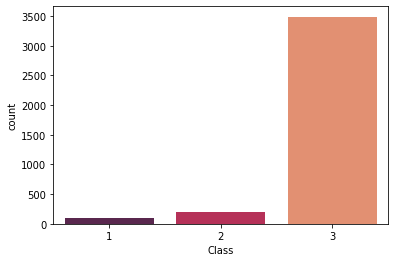

In [12]:
#VISUALISING CLASS DISTRIBUTION
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Class'],palette='rocket')

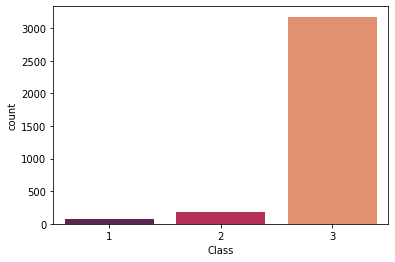

In [11]:
sns.countplot(df_test['Class'],palette='rocket')

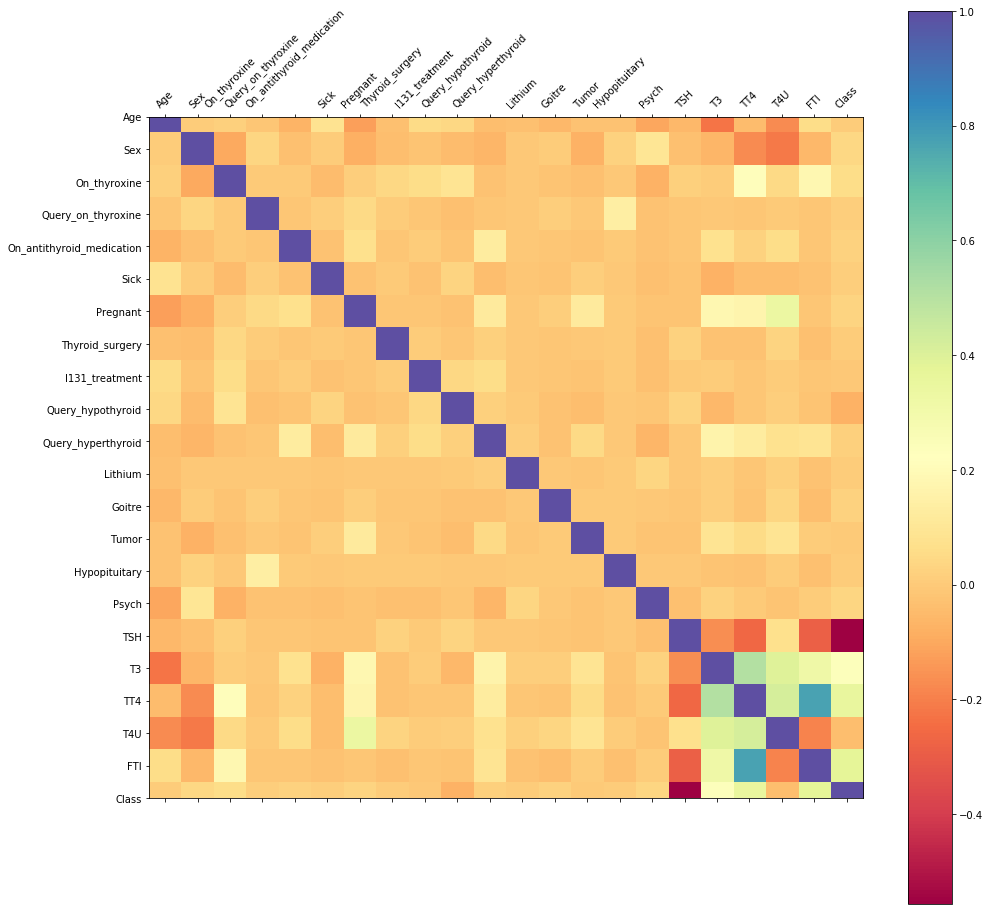

In [13]:
from matplotlib import rcParams
import numpy as np
rcParams['figure.figsize'] = 2,20
a=df.corr()
plt.matshow(df.corr(),cmap="Spectral")
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns,rotation=45)

plt.colorbar()

#very less correlation so we can say that no data is related with each other
#given value of one feature we cannot predict any other feature
#although there is some relation between T3, TT4 and FTI

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler() 
scalar.fit(df) 
scaled_df = scalar.transform(df) 

p = PCA(n_components = 2) 
p.fit(scaled_df) 
x_axis = p.transform(scaled_df) 
x_std=p.fit_transform(scaled_df)
x_std.shape
print(x_std)

[[ 0.55236367 -1.43478847]
 [ 1.7185296   1.5361572 ]
 [ 0.21348247  1.27250869]
 ...
 [-0.88379323  0.2301124 ]
 [-0.20377907 -1.20166981]
 [-0.29431663 -0.1454486 ]]


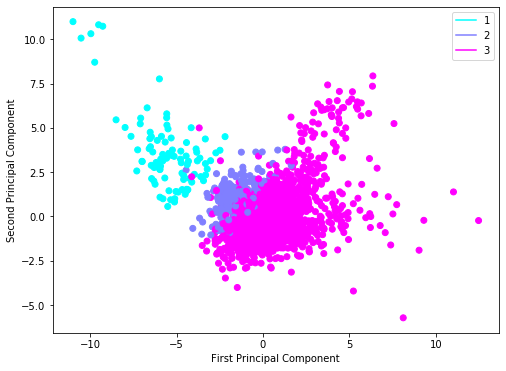

In [15]:
plt.figure(figsize =(8, 6)) 
scatter=plt.scatter(x_axis[:, 0], x_axis[:, 1], c = df['Class'], cmap ='cool') 
labels=np.unique(df['Class'])
handles = [plt.Line2D([],[],color=scatter.cmap(scatter.norm(yi))) for yi in labels]
plt.legend(handles, labels)
  
# labeling x and y axes 
plt.xlabel('First Principal Component') 

plt.ylabel('Second Principal Component')

plt.show()

In [16]:
#Normalise the data
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df.iloc[:,0:21])
test_normalised=sc_X.fit_transform(df_test.iloc[:,0:21])

In [17]:
#ENCOING THE LABELS FOR KERAS
def one_hot_encode(labels):
    n_labels=len(labels)
    n_unique_labels=len(np.unique(labels))
    one_hot_encode=np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode
    

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [19]:
#SELECTING TOP 5 FEATURES
new_columns=['TSH','T3','TT4','T4U','FTI','Class']
df_train=df[new_columns]
df_test_new=df_test[new_columns]


In [20]:
#NORMALIZATION
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(df_train.iloc[:,0:5])
y_train=df_train['Class']
sc_X = StandardScaler()
X_test = sc_X.fit_transform(df_test_new.iloc[:,0:5])
y_test=df_test_new['Class']



In [21]:
#IMPORTING THE REQUIRED LIBRARIES
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score



In [ ]:
#KNN CLASSIFIER SELECTING VALUE OF K

seed=7
X=X_train
y=y_train
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
acc_train=[]
acc_val=[]
for i in range(10):
    
    acc_train.append(0)
    acc_val.append(0)
    
for k in range(0,10):
    print(k)
    clf_knn = KNeighborsClassifier(n_neighbors=k+1)
    
    for train, test in kfold.split(X,y):
        clf_knn=clf_knn.fit(X[train,:],y[train])


        y_pred = clf_knn.predict(X[test,:])
        knn_train=clf_knn.score(X[train,:],y[train])
        knn_test= accuracy_score(y[test],y_pred)
        print('KNN accuracy for training data', knn_train)
        print('KNN accuracy for validation data',knn_test)
        acc_train[k]=acc_train[k]+knn_train
        acc_val[k]+=knn_test

        



In [ ]:
for i in range(10):
    
    acc_train[i]*=10
    
    acc_val[i]*=10

In [ ]:
print(acc_train)
print(acc_val)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9,10],acc_train,label="Training accuracy")
plt.plot([1,2,3,4,5,6,7,8,9,10],acc_val,color='red',label="Validation accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy for Different Values of k in KNN Classifier")
plt.legend()
plt.show()

In [ ]:
#Training the model with k=8
X=X_train
y=y_train
avg_acc_train=[]
avg_acc_validation=[]
clf_knn = KNeighborsClassifier(n_neighbors=8)
seed=7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train, test in kfold.split(X,y):
    clf_knn=clf_knn.fit(X[train,:],y[train])
    y_pred = clf_knn.predict(X[test,:])
    knn_train=clf_knn.score(X[train,:],y[train])
    knn_test= accuracy_score(y[test],y_pred)
    print('KNN accuracy for training data', knn_train)
    print('KNN accuracy for validation data',knn_test)
    avg_acc_train.append(knn_train)
    avg_acc_validation.append(knn_test)
    
sum_train=0
sum_val=0
for i in range(10):
    sum_train+=avg_acc_train[i]
    sum_val+=avg_acc_validation[i]
avg_train=sum_train/10
avg_val=sum_val/10
print("KNN avg training acc is ",avg_train)
print("KNN avg testing acc is ",avg_val)
    



In [ ]:
#TESTING AND EVALUATIONG THE MODEL
y_pred = clf_knn.predict(X_test)
acc_test= accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average="weighted")
r=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")



In [ ]:
print("Accuracy for KNN at k=8 is ",acc_test)
print("Precision for KNN at k=8 is ",p)
print("Recall for KNN at k=8 is ",r)
print("F1-Score for KNN at k=8 is ",f1)





In [ ]:
#DECISION TREE CLASSIFIER SELECTING HEIGHT PARAMETER
from sklearn.tree import DecisionTreeClassifier
seed=7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
X=X_train
y=y_train
acc_train=[]
acc_validation=[]
for i in range(15):
    acc_train.append(0)
    acc_validation.append(0)
    
for h in range(1,16,1):
    descision_clf=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = h)
    for train, test in kfold.split(X,y):
        descision_clf=descision_clf.fit(X[train,:],y[train])
        y_pred_dt = descision_clf.predict(X[test,:])
        dt_train=descision_clf.score(X[train,:],y[train])
        dt_test= accuracy_score(y_train[test],y_pred_dt)
        acc_train[h-1]+=dt_train
        acc_validation[h-1]+=dt_test
        
for i in range(15):
    acc_train[i]/=10
    acc_validation[i]/=10

    



In [ ]:
print(acc_train)
print(acc_validation)

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],acc_train,label="Training accuracy")
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],acc_validation,color='red',label="Validation Accuracy")
plt.xlabel("Height of DT")
plt.ylabel("Accuracy")
plt.title("Accuracy of DT Classifier for Different Heights")
plt.legend()
plt.show()

In [ ]:
#Training the DT Model with ht 3
X=X_train
y=y_train
avg_acc_train=[]
avg_acc_validation=[]
descision_clf=DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
seed=7
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
for train, test in kfold.split(X,y):
    descision_clf=descision_clf.fit(X[train,:],y[train])
    y_pred = descision_clf.predict(X[test,:])
    dt_train=descision_clf.score(X[train,:],y[train])
    dt_test= accuracy_score(y[test],y_pred)
    print('DT accuracy for training data', dt_train)
    print('DT accuracy for validation data',dt_test)
    avg_acc_train.append(dt_train)
    avg_acc_validation.append(dt_test)
    
sum_train=0
sum_val=0
for i in range(10):
    sum_train+=avg_acc_train[i]
    sum_val+=avg_acc_validation[i]
avg_train=sum_train/10
avg_val=sum_val/10
print("DT avg training acc is ",avg_train)
print("DT avg validation acc is ",avg_val)
    

In [ ]:
#TESTING AND EVALUATING THE MODEL
y_pred = descision_clf.predict(X_test)
acc_test= accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average="weighted")
r=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")

In [ ]:
print("Accuracy for DT with ht=3 is ",acc_test)
print("Precision for DT with ht=3 is ",p)
print("Recall for DT with ht=3 is ",r)
print("F1-Score for DT with ht=3 is ",f1)

In [ ]:
#STORING THE MODEL FOR UI
import pickle
pickle.dump( descision_clf, open("model.pkl","wb"))

In [ ]:
#TRAINING THE NB CLASSIFIER
clf_nb = GaussianNB()
avg_acc_train=[]
avg_acc_validation=[]
for train, test in kfold.split(X,y):
    clf_nb=clf_nb.fit(X[train,:],y[train])
    y_pred_nb = clf_nb.predict(X[test,:])
    nb_train=clf_nb.score(X[train,:],y[train])
    nb_test= accuracy_score(y[test],y_pred_nb)
    avg_acc_train.append(nb_train)
    avg_acc_validation.append(nb_test)
sum_train=0
sum_validation=0
for i in range(10):
    sum_train+=avg_acc_train[i]
    sum_validation+=avg_acc_validation[i]
avg_train=sum_train/10
avg_validation=sum_validation/10
print("Avg training accuracy of NB is ",avg_train)
print("Avg validation accuracy of NB is ",avg_validation)





In [ ]:
#TESTING AND EVALUATING THE MODEL
y_pred = clf_nb.predict(X_test)
acc_test= accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average="weighted")
r=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")


In [ ]:
print("Accuracy for NB is ",acc_test)
print("Precision for NB is ",p)
print("Recall for NB is ",r)
print("F1-Score for NB is ",f1)

In [ ]:
#MLP CLASSIFIER
from sklearn.neural_network import MLPClassifier
clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

avg_acc_train=[]
avg_acc_validation=[]

for train, test in kfold.split(X,y):
    
    clf_mlp=clf_mlp.fit(X[train,:],y[train])
    y_pred_mlp = clf_mlp.predict(X[test,:])
    mlp_train=clf_mlp.score(X[train,:],y[train])
    mlp_test= accuracy_score(y[test],y_pred_mlp)
    avg_acc_train.append(mlp_train)
    avg_acc_validation.append(mlp_test)
sum_train=0
sum_validation=0
for i in range(10):
    sum_train+=avg_acc_train[i]
    sum_validation+=avg_acc_validation[i]
avg_train=sum_train/10
avg_validation=sum_validation/10
print("Avg training accuracy of MLP is ",avg_train)
print("Avg validation accuracy of MLP is ",avg_validation)




In [ ]:
#TESTING AND EVALUATING THE MODEL
y_pred = clf_mlp.predict(X_test)
acc_test= accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred,average="weighted")
r=recall_score(y_test,y_pred,average="weighted")
f1=f1_score(y_test,y_pred,average="weighted")

In [ ]:
print("Accuracy for MLP is ",acc_test)
print("Precision for MLP is ",p)
print("Recall for MLP is ",r)
print("F1-Score for MLP is ",f1)

In [23]:
#TRAINING THE KERAS MODEL
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
X=X_train
y=y_train
print(y.shape)
iteration=1
for train, test in kfold.split(X,y):
    if(iteration==1):
        encoder.fit(y)
        y=encoder.transform(y)
        y=one_hot_encode(y)
    model = Sequential()
    model.add(Dense(100, input_dim=5, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
    # Fit the model
    model.fit(X[train,:], y[train], epochs=150, batch_size=16, verbose=0)
    # evaluate the model
    scores = model.evaluate(X[test,:], y[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
    iteration=iteration+1

(3772,)
accuracy: 97.09%
accuracy: 96.42%
accuracy: 97.88%
accuracy: 96.95%
accuracy: 96.81%
